$\textbf{PROGRAMMING ASSIGNMENT}$
---

Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.

Dataset: The chosen dataset for this assignment is: https://archive.ics.uci.edu/dataset/46/hepatitis.


### Complete the Tasks in bold

## Data Exploration



In [36]:
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [8]:
# fetch dataset 
stock_portfolio_performance = fetch_ucirepo(id=390) 
  
# data (as pandas dataframes) 
X = stock_portfolio_performance.data.features 
y = stock_portfolio_performance.data.targets 
  
# variable information 
print(stock_portfolio_performance.variables) 

                                     name     role         type demographic  \
0                                  period       ID  Categorical        None   
1                                      ID       ID      Integer        None   
2                               Large B/P  Feature   Continuous        None   
3                               Large ROE  Feature   Continuous        None   
4                               Large S/P  Feature   Continuous        None   
5   Large Return Rate in the last quarter  Feature   Continuous        None   
6                      Large Market Value  Feature   Continuous        None   
7                   Small systematic Risk  Feature   Continuous        None   
8                           Annual Return  Feature  Categorical        None   
9                           Excess Return  Feature  Categorical        None   
10                        Systematic Risk  Feature   Continuous        None   
11                             Total Risk  Feature  

In [9]:
#period_map = {'first': 1, 'second': 2, 'third': 3, 'fourth': 4}

#day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}

#X.loc[:, 'month'] = X['moPenth'].map(period_map)
#X.loc[:, 'day'] = X['day'].map(day_map)

df = pd.concat([X, y], axis=1)

print(df)

     Large B/P  Large ROE  Large S/P  Large Return Rate in the last quarter  \
0        1.000      0.000      0.000                                  0.000   
1        0.000      1.000      0.000                                  0.000   
2        0.000      0.000      1.000                                  0.000   
3        0.000      0.000      0.000                                  1.000   
4        0.000      0.000      0.000                                  0.000   
..         ...        ...        ...                                    ...   
310      0.200      0.200      0.200                                  0.000   
311      0.200      0.200      0.000                                  0.200   
312      0.200      0.000      0.200                                  0.200   
313      0.000      0.200      0.200                                  0.200   
314      0.167      0.167      0.167                                  0.167   

     Large Market Value  Small systematic Risk Annu

**TASK: Create a correlation heatmap.**

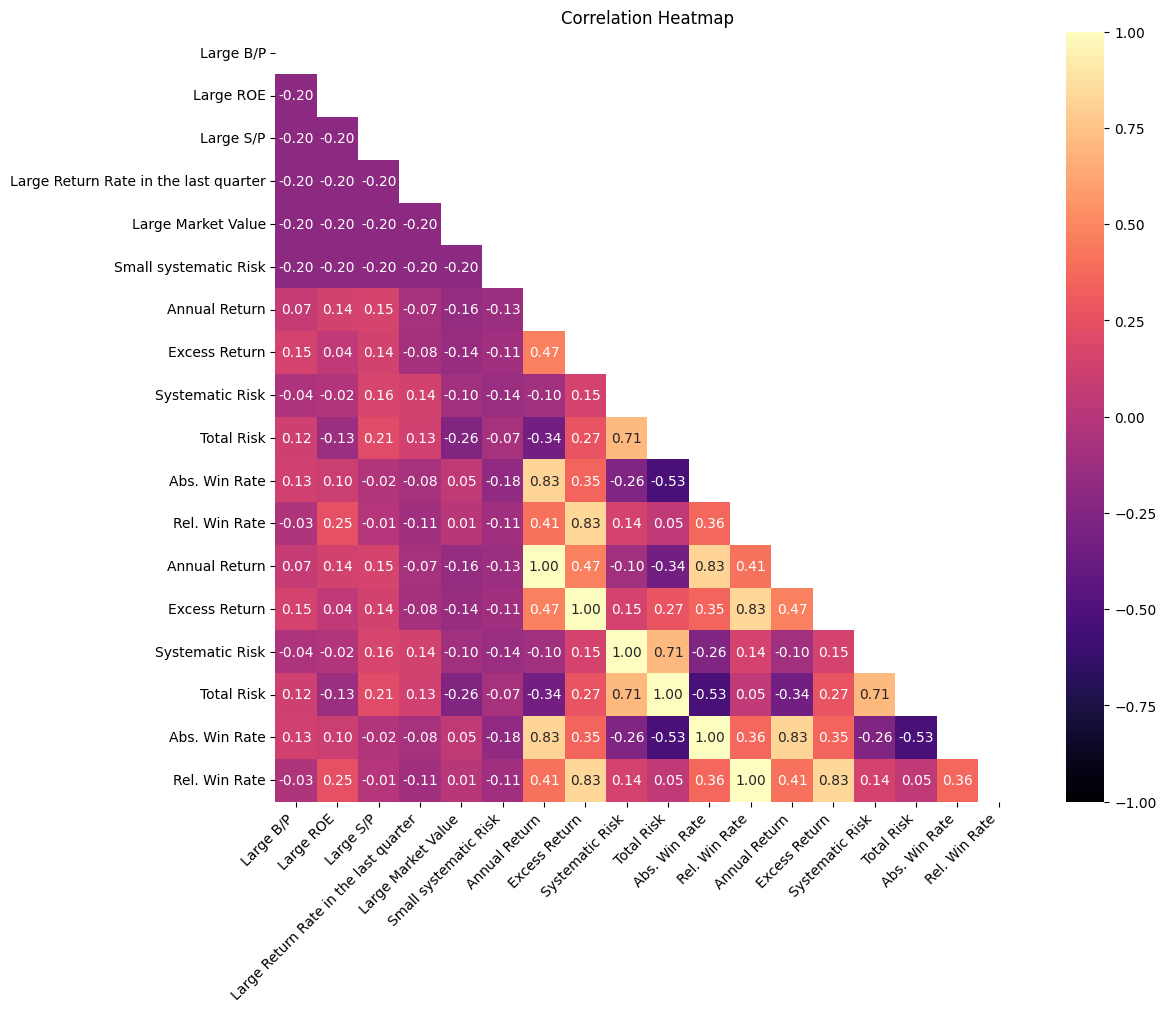

In [23]:
#numeric_df = df.select_dtypes(include=[np.number])

def convert_to_float(value):
    if isinstance(value, str) and '%' in value:
        return float(value.replace('%', '')) / 100
    try:
        return float(value)
    except ValueError:
        return np.nan

df = df.dropna()

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='magma', fmt=".2f", mask=mask)
plt.xticks(rotation=45, ha="right")

plt.title('Correlation Heatmap')

plt.show()


**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [22]:
def convert_to_float(value):
    if isinstance(value, str) and '%' in value:
        return float(value.replace('%', '')) / 100
    try:
        return float(value)
    except ValueError:
        return np.nan

df = df.dropna()

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

correlation_with_target = X.corrwith(y).abs()

sorted_correlation = correlation_with_target.sort_values(ascending=False)

top_correlated_features = sorted_correlation.head(5)

print("The top 5 correlated frequencies with the target/label:\n");
print(top_correlated_features)

The top 5 correlated frequencies with the target/label:

Rel. Win Rate    1.000000
Excess Return    0.830098
Excess Return    0.830098
Annual Return    0.407003
Annual Return    0.407003
dtype: float64


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (283, 17)
y_train: (283,)
X_test: (32, 17)
y_test: (32,)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [26]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsRegressor())  
])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [27]:
param_grid = {'knn__n_neighbors': list(range(1,20))}
pipeline.set_params(knn=KNeighborsRegressor())

full_cv_regressor = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
full_cv_regressor.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='neg_mean_squared_error')

In [28]:
print("The best parameters are:")

param_dict = full_cv_regressor.best_estimator_.get_params()
full_cv_regressor.best_estimator_.get_params()

The best parameters are:


{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsRegressor(n_neighbors=4))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsRegressor(n_neighbors=4),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 4,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

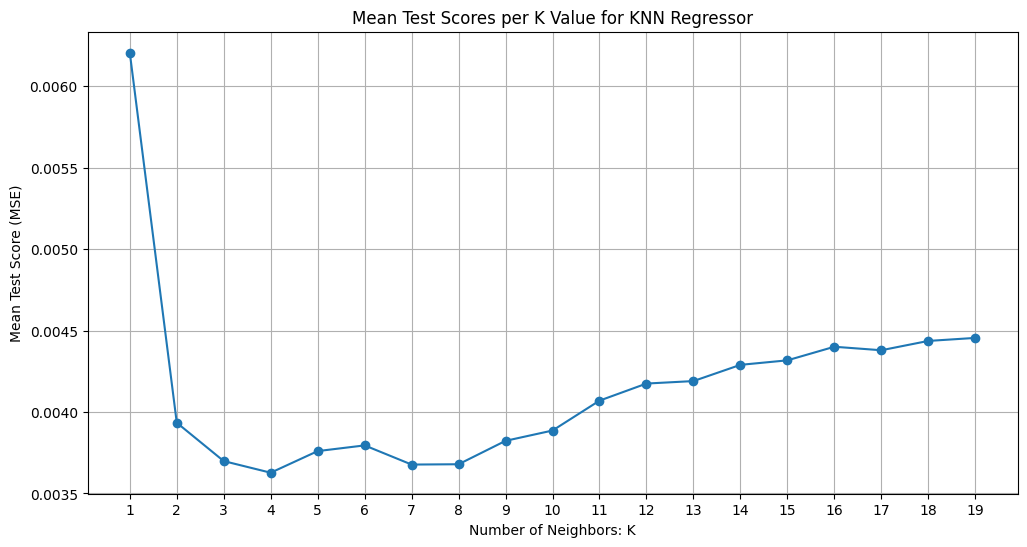

In [30]:
cv_results = full_cv_regressor.cv_results_
mean_test_scores = cv_results['mean_test_score']
k_values = [param['knn__n_neighbors'] for param in cv_results['params']]

plt.figure(figsize=(12, 6))
plt.plot(k_values, -mean_test_scores, marker='o') 

plt.title('Mean Test Scores per K Value for KNN Regressor')

plt.xlabel('Number of Neighbors: K')
plt.ylabel('Mean Test Score (MSE)')

plt.xticks(k_values)

plt.grid(True)
plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [40]:
best_estimator = full_cv_regressor.best_estimator_

y_pred = best_estimator.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
try:
    # Try using the new root_mean_squared_error function if available
    from sklearn.metrics import root_mean_squared_error
    rmse = root_mean_squared_error(y_test, y_pred)
except ImportError:
    # Fall back to using mean_squared_error with squared=False
    rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Regression Metrics:")
print(f"{'Mean Absolute Error (MAE):':<30} {mae:.4f}")
print(f"{'Mean Squared Error (MSE):':<30} {mse:.4f}")
print(f"{'Root Mean Squared Error (RMSE):':<30} {rmse:.4f}")
print(f"{'R^2 Score:':<30} {r2:.4f}")

Regression Metrics:
Mean Absolute Error (MAE):     0.0470
Mean Squared Error (MSE):      0.0032
Root Mean Squared Error (RMSE): 0.0565
R^2 Score:                     0.8833
